In [13]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import random
from tqdm import tqdm_notebook as tqdm

### Random Walk
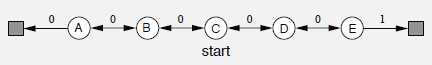

<ol>
    <li>Given is Markov reward Process i.e MRP. There are 5 state A, B ,C ,D E.</li>
    <li>From each state we can move either go right or left by equal probebility.</li>
    <li>All reward are 0 except when we movem form E to Terminal state</li>
    
</ol>

In [15]:
class RandomWalk:
    def __init__(self):
        '''
        define the constant values throught state
        '''
        #True values of state
        self.statTrueValue = np.array([i/6 for i in range(1,6)])
        self.move = [-1,1] # -1:left and 1:right 
        
    def getEpisodes(self):
        '''
        get State and reward seuence
        '''
        reward= []
        stateVisited = [2]
        state = 2
        while True:
            move = np.random.choice(self.move)
            if state == 4 and move == 1:
                reward.append(1)
                stateVisited.append(5)
                break;
            elif state == 0 and move == -1:
                reward.append(0)
                stateVisited.append(5)
                break;
            else:
                state += move
                reward.append(0)
                stateVisited.append(state)
        return stateVisited , reward
    
    def calculateRMS(self,estimate):
        '''
        Calculate and RMS between True and estimate of states
        '''
        return np.sqrt(np.average(np.square((self.statTrueValue - estimate))))
        
    def MC(self,alpha,iteration = 100):
        '''
        MC code implemetation
        '''
        #initial values of each state
        #[0:A, 1:B , 2:C , 3: D , 4: E,5:Terminal]
        state = np.ones(6) * 0.5
        state[5] = 0
        rms = []
        estvalues = dict()
        estvalues[0] = cp.deepcopy(state)
        for i in range(1,iteration+1):
            stateVisited,reward = self.getEpisodes()
            reward = np.sum(reward)
            for j in range(len(stateVisited) - 2,-1,-1):
#                 if stateVisited[j] not in stateVisited[0 : j-1]:
                st = stateVisited[j]
                state[st] = state[st] +  (alpha * (reward - state[st]))
            #calculate the RMS
            rms.append(self.calculateRMS(state[:-1]))
            if (i == 1) or (i == 10) or (i == 100) or (i == iteration):
                estvalues[i] = cp.deepcopy(state)
        return estvalues,rms
    
    def TD(self,alpha,iteration = 100):
        '''
        TD code implementation
        '''
        #initial values of each state
        #[0:A, 1:B , 2:C , 3: D , 4: E , 5: Terminal]
        state = np.ones(6) * 0.5
        state[5] = 0
        estvalues = dict()
        estvalues[0] = cp.deepcopy(state)
        rms = []
        for j in range(1,iteration + 1):
            stateVisited,reward = self.getEpisodes()
            for i in range(0,len(stateVisited)-1):
                s = stateVisited[i]
                sdash = stateVisited[i+1]
                state[s] = state[s] + (alpha * (reward[i] + state[sdash] - state[s]))
             #calculate the RMS
            rms.append(self.calculateRMS(state[:-1]))
            if (j == 1) or (j == 10) or (j == 100) or (j == iteration):
                estvalues[j] = cp.deepcopy(state)
        return estvalues , rms    

In [16]:
rm = RandomWalk()
# rm.getEpisodes()
estTD , rms =  rm.TD(alpha = 0.1)

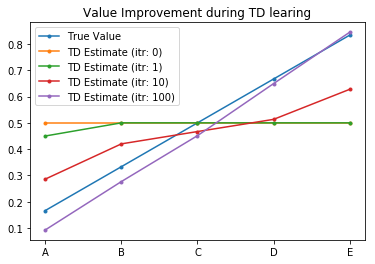

In [17]:
x = [i for i in range(1,6)]
plt.plot(x,rm.statTrueValue,label = "True Value",marker='.')
plt.plot(x,estTD[0][:-1],label = "TD Estimate (itr: 0)",marker='.')
plt.plot(x,estTD[1][:-1],label = "TD Estimate (itr: 1)",marker='.')
plt.plot(x,estTD[10][:-1],label = "TD Estimate (itr: 10)",marker='.')
plt.plot(x,estTD[100][:-1],label = "TD Estimate (itr: 100)",marker='.')
# plt.plot(x,estTD[200][:-1],label = "TD Estimate (itr: 100)",marker='.')
plt.legend()
plt.xticks(x,['A','B','C','D','E'])
plt.title("Value Improvement during TD learing")
plt.show()

In [20]:
# Code to plot the RMS of the states
rm = RandomWalk()
rmsTD01 = np.zeros(100)
rmsTD05 = np.zeros(100) 
rmsTD1  = np.zeros(100)
rmsTD15 = np.zeros(100) 
rmsMC01 = np.zeros(100)
rmsMC02 = np.zeros(100)
rmsMC03 = np.zeros(100)
rmsMC04 = np.zeros(100)
rmsMC05 = np.zeros(100)
for i in tqdm(range(1,101)):
    _ , rmsTD01i =  rm.TD(alpha = 0.01)
    rmsTD01 += cp.deepcopy(rmsTD01i)
    _ , rmsTD05i =  rm.TD(alpha = 0.05)
    rmsTD05 += cp.deepcopy(rmsTD05i)
    _ , rmsTD1i =  rm.TD(alpha = 0.1)
    rmsTD1 += cp.deepcopy(rmsTD1i)
    _ , rmsTD15i =  rm.TD(alpha = 0.15)
    rmsTD15 += cp.deepcopy(rmsTD15i)
    _ , rmsMC01i = rm.MC(alpha = .01)
    rmsMC01 += cp.deepcopy(rmsMC01i)
    _ , rmsMC02i = rm.MC(alpha = .02)
    rmsMC02 += cp.deepcopy(rmsMC02i)
    _ , rmsMC03i = rm.MC(alpha = .03)
    rmsMC03 += cp.deepcopy(rmsMC03i)
    _ , rmsMC04i = rm.MC(alpha = .04)
    rmsMC04 += cp.deepcopy(rmsMC04i)
    _ , rmsMC05i = rm.MC(alpha = .05)
    rmsMC05 += cp.deepcopy(rmsMC05i)

rmsTD01 /= 100
rmsTD05 /= 100
rmsTD1  /= 100
rmsTD15 /= 100 
rmsMC01 /= 100 
rmsMC02 /= 100
rmsMC03 /= 100 
rmsMC04 /= 100
rmsMC05 /= 100

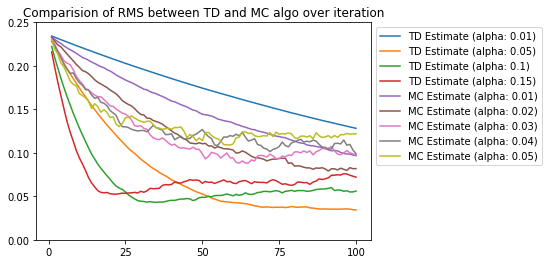

In [21]:
x = [i for i in range(1,101)]
plt.plot(x,rmsTD01,label = "TD Estimate (alpha: 0.01)")
plt.plot(x,rmsTD05,label = "TD Estimate (alpha: 0.05)")
plt.plot(x,rmsTD1,label = "TD Estimate (alpha: 0.1)")
plt.plot(x,rmsTD15,label = "TD Estimate (alpha: 0.15)")
plt.plot(x,rmsMC01,label = "MC Estimate (alpha: 0.01)")
plt.plot(x,rmsMC02,label = "MC Estimate (alpha: 0.02)")
plt.plot(x,rmsMC03,label = "MC Estimate (alpha: 0.03)")
plt.plot(x,rmsMC04,label = "MC Estimate (alpha: 0.04)")
plt.plot(x,rmsMC05,label = "MC Estimate (alpha: 0.05)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') 
plt.xticks([0,25,50,75,100])
plt.yticks([0,.05,.1,.15,.2,.25])
plt.title("Comparision of RMS between TD and MC algo over iteration")
plt.show()